In [424]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
font={'weight':'bold','size':14}
plt.rc('font',**font)
import time
from scipy import linalg

# a)

\begin{equation}
\hat{H}=-\frac{\hbar^2}{2m} \partial_x^2+V(x) \qquad  where \qquad V(x)=\lambda\left[(x^2-x_0^2)^2-x_0^4 \right]    \tag{1} 
\end{equation}

here $\lambda$ is a parameter to fix the unit in the equation, so that whole potential energy has energy unit. Also it controls how deep is the potential-well

$x_0$ is the distance from the minimums (location of minimas) of the double-well potential to the origin.

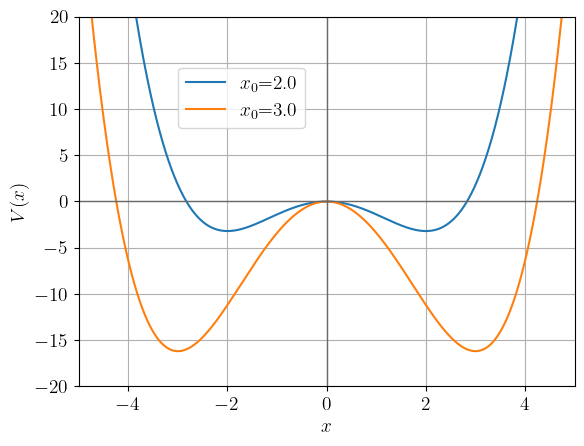

In [425]:
def potential(lamb,x0,x):
    return lamb*((x**2-x0**2)**2-x0**4)

x=np.linspace(-5,5,1001)
lam=0.2

x_0=2.0
y=potential(lam,x_0,x)
plt.plot(x,y,label=r'$x_0$='+str(x_0))

x_0=3.0
y=potential(lam,x_0,x)
plt.plot(x,y,label=r'$x_0$='+str(x_0))
plt.grid()

plt.ylabel(r'$V(x)$')
plt.xlabel(r'$x$')
plt.ylim(-20,20)
plt.xlim(-5.,5.)
plt.plot([-6, 6], [0, 0], "-", color = "dimgrey", linewidth = 1)
plt.plot([0, 0], [-20, 20], "-", color = "dimgrey", linewidth = 1)
plt.legend(loc=(0.2,0.7))
plt.show()

If we consider the change as $x=\alpha \xi$ and $E=\beta \varepsilon$ and from Schrödinger equation $\hat H \psi(x)=E\psi(x)$:

\begin{equation}
\left[-\frac{\hbar^2}{2m \alpha^2} \partial_\xi^2+\lambda\alpha^4(\xi^4-2\xi^2\xi_0^2) \right]\psi(\xi)=\beta\varepsilon\psi(\xi)    \tag{2} 
\end{equation}
We multiply both sides of the equation by $\frac{2m\alpha^2}{\hbar^2}$

\begin{equation}
\left[-\partial_\xi^2+\tilde\lambda(\xi^4-2\xi^2\xi_0^2) \right]\psi(\xi)=\varepsilon\psi(\xi)    \tag{3} 
\end{equation}
where $\tilde\lambda=\frac{2m\lambda\alpha^6}{\hbar^2}$. $\quad$ Above Eq. is true if $\beta=\frac{\hbar^2}{2m \alpha^2}$


# b/c)

In [426]:
ksi_l=-5.0
ksi_r=5.0
N=501
I=np.eye(N,N)
Ham=np.zeros((N,N))
xi_0=1.0
xi = np.linspace(ksi_l, ksi_r, N)
delxi=xi[1]-xi[0]   # discritize xi
lamtil=1.0


In [427]:
def Hamilton(N_steps,del_xi,lamb_til,n):
    delta_n_m=np.eye(N_steps)    # delta_n,m
    delta_n_mpl=np.eye(N_steps,k=1)    #delta_n_m+1
    delta_n_mmi=np.eye(N_steps,k=-1)   #delta_n_m-1
    H=-1.0/del_xi**2*(delta_n_mmi+delta_n_mpl-2.0*delta_n_m)+delta_n_m*(lamb_til*(del_xi**4*n**4-2.0*del_xi**2*n**2))
    return H

In [428]:
H=Hamilton(N,delxi,lamtil,xi)
H_inverse=np.linalg.inv(H)

In [429]:
def Potenz_Meth(Mat_inverse,N_iter,toler):
    v_n=np.random.choice(10,size=N)   # random initial eigenvector
    #v_n=v_0/np.linalg.norm(v_0)
    lam_0=2.0
    for k in range(N_iter):
        omega_n=Mat_inverse@v_n     # as we are taking the inverse, EW is smallest
        omega_norm=np.linalg.norm(omega_n)
        v_n=omega_n/omega_norm      # NEW NORMALIZED EIGENVECTOR
        eigenvalue = 1.0/(v_n.T@omega_n) 
        eigenvector = v_n
        if np.abs(eigenvalue-lam_0)<toler:
            print("converged at N=",k," iterations, Eigenvalue=",eigenvalue)
            break
        lam_0=eigenvalue
    return eigenvalue,eigenvector

In [430]:
st=time.time()
eigVal,eigVec=Potenz_Meth(H_inverse,10000,1e-12)
et = time.time()
print("eigenvalue by power method:")
print(eigVal)
print("time taken=",et-st)




converged at N= 7  iterations, Eigenvalue= 0.09526813720901618
eigenvalue by power method:
0.09526813720901618
time taken= 0.0017135143280029297


# d)

In [431]:
st=time.time()
eig_Val_scip,eig_Vec_scip=linalg.eig(H)
et = time.time()
print("eigenvalue by scipy:")
print(min(eig_Val_scip))
print("time taken=",et-st)




eigenvalue by scipy:
(0.09526813720779814+0j)
time taken= 0.1482248306274414


# e)

In [432]:
lamtil=100.0
H=Hamilton(N,delxi,lamtil,xi)
EW_scip=linalg.eigvals(H)
print("5 smallest eigenvalues py scipy:")
print(sorted(EW_scip)[:5])





5 smallest eigenvalues py scipy:
[(-0.3540810623984018+0j), (-0.29796322248293444+0j), (0.346834628276161+0j), (0.9605895862326773+0j), (1.8216897941759234+0j)]


# Aufgabe 2